import all libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md

read dataset from scv file

In [ ]:
dataset = pd.read_csv('CRYPTOCURRENCY_COINDESK_BTCUSD_NEW.csv')
for i in range(dataset.shape[0]):
  dataset['Close'][i] = float(dataset['Close'][i].replace(',',''))
dataset.head()


,Date,Close
0,10/11/2020,11350
1,10/12/2020,11564
2,10/13/2020,11437
3,10/14/2020,11396
4,10/15/2020,11544


replacing dates with indices and cleaning dataset

In [ ]:
dataset.drop(columns=['Date'], inplace=True)
dataset.rename(columns={"Close":"price"},inplace=True)
dataset.reset_index(inplace=True)
dataset.head()

,index,price
0,0,11350
1,1,11564
2,2,11437
3,3,11396
4,4,11544


splitting dataset for train and test

In [ ]:
train_dataset = dataset.sample(frac=0.8,random_state=0,axis=0)
train_dataset.sort_index(inplace=True)
test_dataset = dataset.drop(train_dataset.index)
print ("Number of total cases: ", str(dataset.shape[0]))
print ("Number of training cases: ", str(train_dataset.shape[0]))
print ("Number of testing cases: " , str(test_dataset.shape[0]))

Number of total cases:  366
Number of training cases:  293
Number of testing cases:  73


plot test_dataset

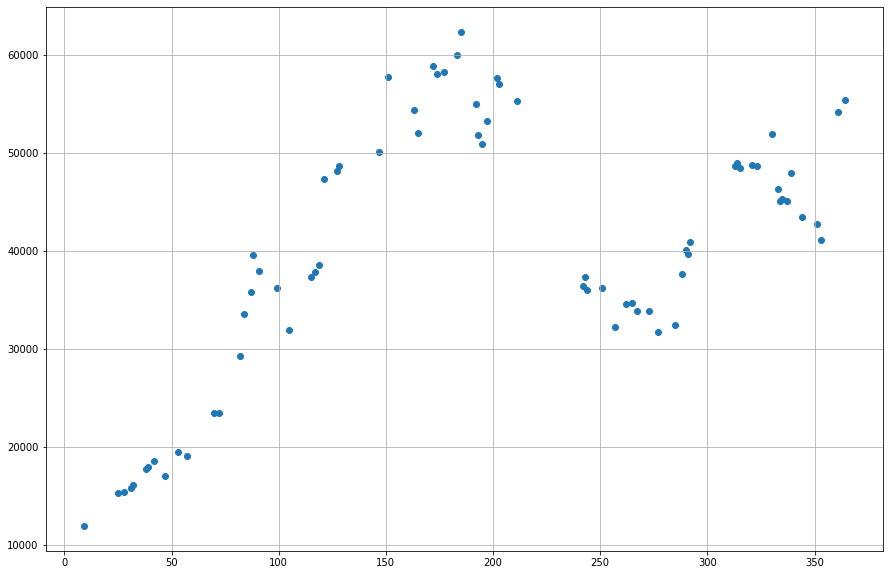

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(test_dataset['index'], test_dataset['price'])
ax.grid(True)
plt.show()

Normalize data to scale and avoid overflow

In [ ]:
train_dataset_price = pd.DataFrame(train_dataset.pop('price'))
test_dataset_price = pd.DataFrame(test_dataset.pop('price'))
train_dataset_info = train_dataset.describe().transpose()
print(train_dataset_info)

def normalize(x):
  return (x - train_dataset_info['mean']) / train_dataset_info['std']

normalized_train_dataset= normalize(train_dataset)
normalized_test_dataset = normalize(test_dataset)
normalized_train_dataset.head()

       count       mean         std  min   25%    50%    75%    max
index  293.0  179.47099  105.347582  0.0  90.0  179.0  269.0  365.0


,index
0,-1.703608
1,-1.694116
2,-1.684623
3,-1.675131
4,-1.665639


In [ ]:
def update(x,t,w,b):
  n = x.shape[0]
  y = w * x + b
  cost = (1 / (2. * n)) * np.sum((y.values - t) ** 2)
  dw = (1 / n) * np.squeeze(np.dot((y.values - t).T, x)[0])
  db = np.squeeze((1 / n) * np.sum(y.values - t))
  cost = np.squeeze(cost)

  d={"dw":dw,"db":db}
  return d,cost


In [ ]:
def find_params(x,t,w,b,alpha, epochs):

  for i in range(epochs):
    d,cost = update(x,t,w,b)
    dw = d["dw"]
    db = d["db"]

    w = w - alpha * dw
    b = b - alpha * db
    if i % 100 == 0:
      print ("Cost after epochs %i: %f" %(i,cost))

  return w,b

In [ ]:
def model(train_x,train_t,test_x,test_t,alpha,epochs):
  w = 0
  b = 0

  w,b = find_params(train_x,train_t,w,b,alpha,epochs)

  print("train error: {} %".format(np.mean(((w * train_x + b).values - train_t) ** 2)))
  print("test error: {} %".format(np.mean(((w * test_x + b).values - test_t) ** 2)))

  return w,b


In [ ]:
w,b = model(normalized_train_dataset,train_dataset_price,normalized_test_dataset,test_dataset_price,alpha=0.01,epochs=2000)

Cost after epochs 0: 837327501.064846
Cost after epochs 100: 169142210.611141
Cost after epochs 200: 79590475.313912
Cost after epochs 300: 67588519.805267
Cost after epochs 400: 65979983.244784
Cost after epochs 500: 65764402.095215
Cost after epochs 600: 65735509.166954
Cost after epochs 700: 65731636.828850
Cost after epochs 800: 65731117.842517
Cost after epochs 900: 65731048.285730
Cost after epochs 1000: 65731038.963408
Cost after epochs 1100: 65731037.713985
Cost after epochs 1200: 65731037.546531
Cost after epochs 1300: 65731037.524088
Cost after epochs 1400: 65731037.521080
Cost after epochs 1500: 65731037.520677
Cost after epochs 1600: 65731037.520622
Cost after epochs 1700: 65731037.520615
Cost after epochs 1800: 65731037.520614
Cost after epochs 1900: 65731037.520614
train error: price    1.314621e+08
dtype: float64 %
test error: price    1.224197e+08
dtype: float64 %


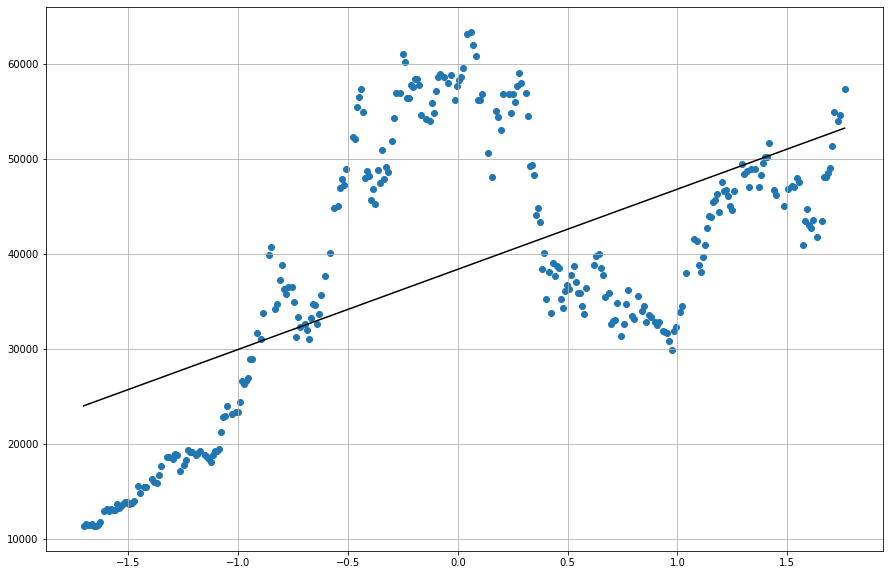

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(normalized_train_dataset['index'], train_dataset_price['price'])
ax.plot(normalized_train_dataset['index'], w * normalized_train_dataset['index'] + b, color='black')
ax.grid(True)

plt.show()

